In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings            #to supress warnings
warnings.filterwarnings('ignore')

#### import dataset

In [2]:
raw_df=pd.read_csv(r"E:\Hands_on_ML\REGRESSION\advertising.csv")

In [3]:
raw_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### ‘Sales’ is the target variable that needs to be predicted. Now, based on this data, our objective is to create a predictive model, that predicts sales based on the money spent on different platforms for marketing.

In [4]:
df=raw_df.copy() #make copy of original dataset

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

##### no null values present

<AxesSubplot:>

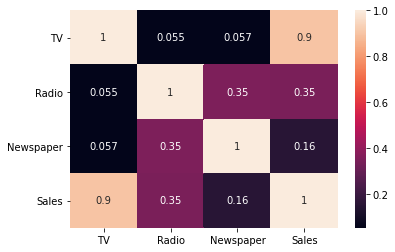

In [11]:
sns.heatmap(df.corr(),annot=True)

<Figure size 1080x720 with 0 Axes>

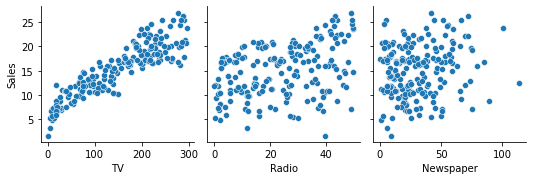

In [12]:
plt.figure(figsize=(15,10))
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')
plt.show()

#### Here we can see that TV has high correlation with Sales variable.
hence we fit linear regression model 

## Perform Regression

In [13]:
x_var=df['TV']
y_var=df['Sales']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_var,y_var,train_size=0.7,random_state=40)

In [38]:
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(140,) (60,) (60,) (140,)


## Model training

In [51]:
x_train_n = x_train.values.reshape(-1,1)
x_test_n = x_test.values.reshape(-1,1)

In [53]:
print(x_train_n.shape,x_test_n.shape)

(140, 1) (60, 1)


In [52]:
### Simple Linear Regression/ Multiple Linear Regression ###

from sklearn.linear_model import LinearRegression
regressor = LinearRegression( fit_intercept = True)

regressor.fit(x_train_n, y_train)

LinearRegression()

In [56]:
print("intercept is: ",regressor.intercept_)
print("slope is: ",regressor.coef_)

intercept is:  6.997598778194721
slope is:  [0.0553833]


# Using STATSMODEL library

In [40]:
import statsmodels.api as sm

In [41]:
x_train_sm=sm.add_constant(x_train)      # here we have to add constant 
lm=sm.OLS(y_train,x_train_sm).fit()

In [43]:
lm.params    #intercept and slopes

const    6.997599
TV       0.055383
dtype: float64

### Evaluation metrics

In [44]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     607.4
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           2.14e-52
Time:                        17:42:30   Log-Likelihood:                -312.71
No. Observations:                 140   AIC:                             629.4
Df Residuals:                     138   BIC:                             635.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9976      0.377     18.538      0.0

here R^2 is 0.814. Meaning that 81.6% of the variance in `Sales` is explained by `TV`. This is a decent R-squared value.
here we can see that p-values is low hence we can see that variable TV is contributing signficantly

#### prediction on test dataset

In [46]:
x_test_sm=sm.add_constant(x_test)
y_pred=lm.predict(x_test_sm)

In [48]:
y_pred.head()

96     17.941339
5       7.479433
116    14.706954
35     23.097524
183    22.925836
dtype: float64

In [62]:
table_acual_pred = pd.DataFrame({
    'Actual': y_test.values, 
    'Predict': y_pred})
table_acual_pred.head()

,Actual,Predict
96,16.7,17.941339
5,7.2,7.479433
116,12.2,14.706954
35,17.8,23.097524
183,26.2,22.925836


<AxesSubplot:>

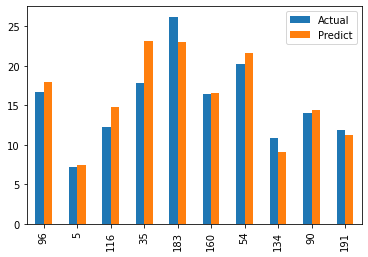

In [67]:
table_acual_pred.head(10).plot(kind="bar")

### Evaluation metrics

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
print("RMSE is: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R^2 is: ",r2_score(y_test,y_pred))

RMSE is:  2.343157416850612
R^2 is:  0.8051600362079571


# Multiple Linear Regression

In [68]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [72]:
from sklearn.model_selection import train_test_split
x_train_M,x_test_M,y_train_M,y_test_M = train_test_split(x,y,train_size=0.7,random_state=40)

In [74]:
print(x_train_M.shape,x_test_M.shape,y_test_M.shape,y_train_M.shape)

(140, 3) (60, 3) (60,) (140,)


In [75]:
ml=LinearRegression()
ml.fit(x_train_M,y_train_M)

LinearRegression()

In [76]:
print(ml.coef_)
print(ml.intercept_)

[ 0.05336672  0.11626114 -0.00583884]
4.849458302233938


In [79]:
y_pred_M = ml.predict(x_test_M)
y_pred_M

array([15.76718622, 10.56100584, 13.79116527, 20.79020318, 24.77772644,
       15.98029118, 22.12437792, 10.92334253, 12.53198666, 10.09923266,
       19.81090212, 20.25539715, 14.63378323, 15.80844409, 15.96629008,
       10.66769366, 15.78138009, 18.84491532,  8.44778019, 14.31241754,
       11.99907321, 21.14406478, 16.9155013 , 22.06055113, 17.03701504,
       10.30997574, 10.81893773, 17.25875404,  8.081342  ,  9.4399583 ,
       21.3471292 , 10.57899158, 18.75209489, 21.21661517, 19.07420423,
       10.05002255, 17.90801441, 22.03065588, 13.90967224, 23.26637907,
       12.02509872,  8.33794282, 21.36441005, 10.72369154, 23.72784977,
       14.51067861, 19.26276088, 17.26936867, 19.46922781, 11.49323533,
       25.06780837,  9.53224438, 10.89344934, 16.65306922, 10.39898796,
       18.0643345 , 16.00239864, 21.01488729, 12.50515518, 10.69552954])

In [80]:
print("RMSE is: ", np.sqrt(mean_squared_error(y_test_M,y_pred)))
print("R^2 is: ",r2_score(y_test,y_pred_M))

RMSE is:  2.343157416850612
R^2 is:  0.8651167784377882


In [81]:
ml.score(x_test_M,y_test_M)

0.8651167784377882